# **Title of Project**
### COVID-19 Data Analysis and Predictions
---

# **Objective**

### The objective is to analyse the COVID-19 situation globally, and represent the information graphically and numerically. The project also focuses on comparing situation of COVID-19 in India from different countries at a global level, along with making predictions of total number of COVID cases at a particular point of time.

# **Data Source**
### Kaggle

# **Import Library**

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from IPython.display import display
import plotly.express as px
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

# **Import Data**

In [5]:
country_df=pd.read_csv("worldometer_data.csv")
india_predictions=pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")

# **Describe Data**

In [6]:
country_df.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


In [7]:
india_predictions.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [8]:
country_df.describe().astype('int64')

,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop
count,208,209,4,188,3,205,3,205,122,208,187,191,191
mean,30415486,91718,1980,3792,300,58878,1706,27664,534,3196,98,1402404,83959
std,104766099,432586,3129,15487,451,256698,2154,174632,2047,5191,174,5553366,152730
min,801,10,20,1,1,7,42,0,1,3,0,61,4
25%,966314,712,27,22,40,334,489,86,3,282,6,25752,8956
50%,7041972,4491,656,113,80,2178,936,899,27,1015,29,135702,32585
75%,25756135,36896,2609,786,449,20553,2538,7124,160,3841,98,757696,92154
max,1381344997,5032179,6590,162804,819,2576668,4140,2292707,18296,39922,1238,63139605,995282


In [9]:
india_predictions.describe().astype('int64')

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,160098,160034,158883,142384,142549,142419,159354,159290,158144,141653,141818,141688,123375,22940,22940,23722,23722,5253,5253,10637,10637,66218,68076,68076,66218,82576,82576,77529,76942,43604,41495,38860,16300,36103,81123,43604,41495,38860,16300,81123,79837,79837,127445,162029,145055,135168,133702,134443,135813,89462,134129,141160,104003,102576,67239,121281,152241,133604,5600,5600,5600,5600
mean,2424721,11196,11121,56459,171,170,27726,158,156,496,1,1,1,913,23,4131,162,473,15,6101,101,67648,16687881,710,3,60401,2,0,204,163978976,84783599,65767381,15916458,1145239,523752,70,36,31,10,3369,240902,0,54,147620019,464,30,8,5,19652,13,260,8,10,32,50,3,73,0,36926,9,15,944
std,14631893,82679,80367,295998,833,812,47678,657,506,768,5,3,0,2700,27,11779,206,633,16,15617,109,216038,62120255,1712,8,193496,14,0,4248,743038334,386324971,314601231,76094357,4315297,2817532,62,28,27,15,3956,2214891,0,20,705975163,2145,9,6,4,20650,20,119,4,10,13,31,2,7,0,103043,16,30,1388
min,1,-74347,-6223,1,-1918,-232,0,-13876,-1936,0,-75,-10,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,47,0,15,1,0,661,0,79,0,0,7,1,0,53,0,-37726,-28,-95,-1826
25%,1892,1,6,76,0,0,595,0,1,17,0,0,0,28,3,124,25,47,3,310,22,2456,361671,33,0,2135,0,0,7,566164,381156,261700,1114,6597,1081,11,8,4,0,694,446,0,40,1172369,36,22,3,2,4449,0,168,5,1,21,19,1,69,0,-81,0,0,-31
50%,24868,78,104,760,2,2,4535,11,18,121,0,0,1,151,13,659,80,221,11,1308,70,9539,1868203,173,0,8448,0,0,17,4508580,2790770,2120617,338990,41273,9546,55,34,25,1,2261,4100,0,54,8478242,85,29,6,3,12951,2,243,7,6,31,49,2,75,0,3217,5,7,451
75%,285370,1041,1107,7123,19,20,35714,98,115,687,1,1,1,607,35,2614,218,681,20,5132,140,38377,8779794,676,2,35642,2,0,53,28262909,16497558,13152500,3490896,272616,66200,119,63,56,15,4835,27997,0,70,33933611,212,39,14,8,27936,21,329,10,19,41,83,4,78,0,23998,14,22,1630
max,423070601,4234712,3438660,5881816,18057,14705,633845,51427,16052,6274,453,144,6,28891,177,154536,1544,4838,221,154692,839,3740296,803614064,27391,534,3080396,1592,0,422065,10531141512,4896359228,4311074622,1259596584,101958237,43022534,333,123,121,88,117497,100594182,11,100,7874965730,20546,48,27,18,116935,77,724,30,44,78,100,13,86,0,1080748,111,374,8626


In [10]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    209 non-null    object 
 1   Continent         208 non-null    object 
 2   Population        208 non-null    float64
 3   TotalCases        209 non-null    int64  
 4   NewCases          4 non-null      float64
 5   TotalDeaths       188 non-null    float64
 6   NewDeaths         3 non-null      float64
 7   TotalRecovered    205 non-null    float64
 8   NewRecovered      3 non-null      float64
 9   ActiveCases       205 non-null    float64
 10  Serious,Critical  122 non-null    float64
 11  Tot Cases/1M pop  208 non-null    float64
 12  Deaths/1M pop     187 non-null    float64
 13  TotalTests        191 non-null    float64
 14  Tests/1M pop      191 non-null    float64
 15  WHO Region        184 non-null    object 
dtypes: float64(12), int64(1), object(3)
memory u

In [11]:
india_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163090 entries, 0 to 163089
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    163090 non-null  object 
 1   continent                                   153316 non-null  object 
 2   location                                    163090 non-null  object 
 3   date                                        163090 non-null  object 
 4   total_cases                                 160098 non-null  float64
 5   new_cases                                   160034 non-null  float64
 6   new_cases_smoothed                          158883 non-null  float64
 7   total_deaths                                142384 non-null  float64
 8   new_deaths                                  142549 non-null  float64
 9   new_deaths_smoothed                         142419 non-null  float64
 

# **Data Visualization**

### Continent-wise

In [12]:
continent_df=pd.read_csv("worldometer_data.csv")
continent_df=continent_df.drop(['NewCases','NewDeaths','NewRecovered','WHO Region'],axis=1)
continent_df=continent_df[continent_df['TotalDeaths'].notna()]
continent_df=continent_df[continent_df['Serious,Critical'].notna()]
continent_df

,Country/Region,Continent,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop
0,USA,North America,3.311981e+08,5032179,162804.0,2576668.0,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0
1,Brazil,South America,2.127107e+08,2917562,98644.0,2047660.0,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0
2,India,Asia,1.381345e+09,2025409,41638.0,1377384.0,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0
3,Russia,Europe,1.459409e+08,871894,14606.0,676357.0,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0
4,South Africa,Africa,5.938157e+07,538184,9604.0,387316.0,141264.0,539.0,9063.0,162.0,3149807.0,53044.0
...,...,...,...,...,...,...,...,...,...,...,...,...
183,Turks and Caicos,North America,3.876800e+04,129,2.0,39.0,88.0,3.0,3327.0,52.0,1252.0,32295.0
185,Monaco,Europe,3.927000e+04,125,4.0,105.0,16.0,2.0,3183.0,102.0,38209.0,972982.0
187,Antigua and Barbuda,North America,9.801000e+04,92,3.0,76.0,13.0,1.0,939.0,31.0,1500.0,15305.0
189,Belize,North America,3.983120e+05,86,2.0,31.0,53.0,2.0,216.0,5.0,3679.0,9236.0


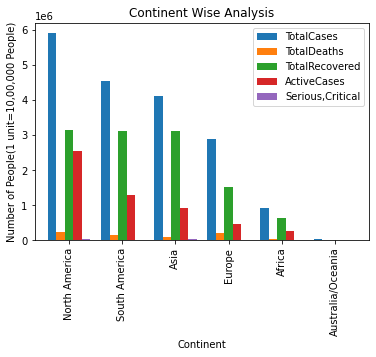

In [13]:
continent_total_df=continent_df.drop(['Population','Country/Region','Tot Cases/1M pop','Deaths/1M pop','Tests/1M pop','TotalTests'],axis=1).groupby(['Continent']).sum()
continent_total_df=continent_total_df.sort_values(by = ['TotalCases'], ascending=[False])
ax=continent_total_df.plot(kind="bar",width=0.8,title="Continent Wise Analysis")
ax.set_ylabel("Number of People(1 unit=10,00,000 People)");

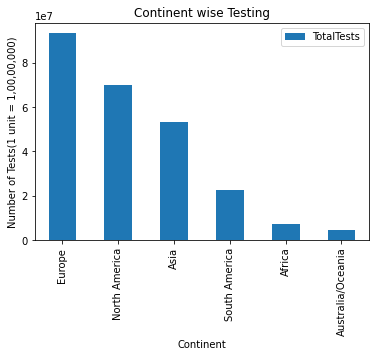

In [14]:
continent_test_df=continent_df.drop(['Population','Country/Region','Tot Cases/1M pop','Deaths/1M pop','TotalCases','TotalDeaths','TotalRecovered','ActiveCases','Serious,Critical','Tests/1M pop'],axis=1).groupby(['Continent']).sum()
continent_test_df=continent_test_df.sort_values(by = ['TotalTests'], ascending=[False])
ax=continent_test_df.plot(kind="bar",title="Continent wise Testing")
ax.set_ylabel("Number of Tests(1 unit = 1,00,00,000)");

In [15]:
continent_test_pop_df=continent_df.drop(['Country/Region','Tot Cases/1M pop','Deaths/1M pop','TotalCases','TotalDeaths','TotalRecovered','ActiveCases','Serious,Critical','Tests/1M pop'],axis=1).groupby(['Continent']).sum()
continent_test_pop_df['Population'] = continent_test_pop_df['Population'].astype('int64') 
continent_test_pop_df['Test Rate'] = continent_test_pop_df['TotalTests']/continent_test_pop_df['Population']
continent_test_pop_df=continent_test_pop_df.drop(['Population','TotalTests'],axis=1)
continent_test_pop_df=continent_test_pop_df.sort_values(by = ['Test Rate'], ascending=[False])

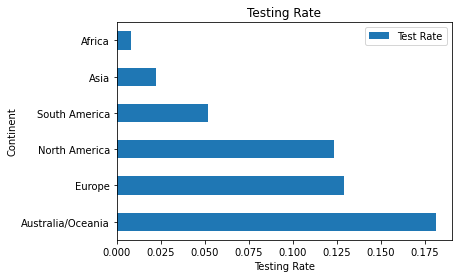

In [16]:
ax=continent_test_pop_df.plot(kind="barh",title="Testing Rate")
ax.set_xlabel("Testing Rate");

If we go continent wise, then North America has the heighest tally of covid cases, followed by South America and Asia. But in case of Testing rate, Australia has the heighest testing rate, followed by europe and North America

### Country Wise

In [17]:
country_df=pd.read_csv("worldometer_data.csv")
country_df=country_df.drop(['Continent','NewCases','NewDeaths','NewRecovered','Tot Cases/1M pop','Deaths/1M pop','Tests/1M pop','WHO Region'],axis=1)
country_df=country_df[country_df['TotalDeaths'].notna()]
country_df=country_df[country_df['Serious,Critical'].notna()]
country_df=country_df[country_df['Population'].notna()]
country_df['Population'] = country_df['Population'].astype('int64')
country_df

,Country/Region,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",TotalTests
0,USA,331198130,5032179,162804.0,2576668.0,2292707.0,18296.0,63139605.0
1,Brazil,212710692,2917562,98644.0,2047660.0,771258.0,8318.0,13206188.0
2,India,1381344997,2025409,41638.0,1377384.0,606387.0,8944.0,22149351.0
3,Russia,145940924,871894,14606.0,676357.0,180931.0,2300.0,29716907.0
4,South Africa,59381566,538184,9604.0,387316.0,141264.0,539.0,3149807.0
...,...,...,...,...,...,...,...,...
183,Turks and Caicos,38768,129,2.0,39.0,88.0,3.0,1252.0
185,Monaco,39270,125,4.0,105.0,16.0,2.0,38209.0
187,Antigua and Barbuda,98010,92,3.0,76.0,13.0,1.0,1500.0
189,Belize,398312,86,2.0,31.0,53.0,2.0,3679.0


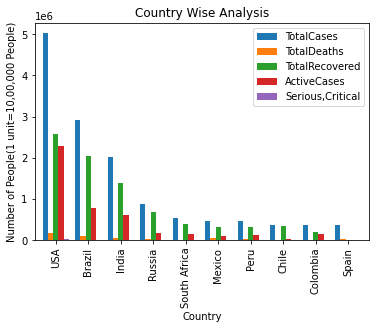

In [18]:
country_total_df=country_df.drop(['Population','TotalTests'],axis=1)
country_total_df=country_total_df.sort_values(by = ['TotalCases'], ascending=[False])[:10].set_index("Country/Region")
ax=country_total_df.plot(kind="bar",width=0.8,title="Country Wise Analysis")
ax.set_xlabel("Country")
ax.set_ylabel("Number of People(1 unit=10,00,000 People)");

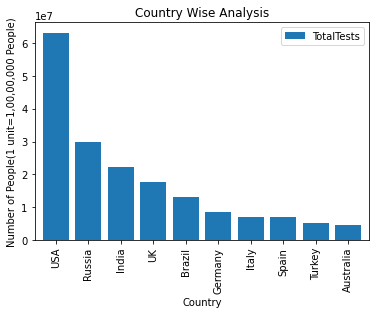

In [19]:
country_test_df=country_df.drop(['TotalCases','TotalDeaths','TotalRecovered','ActiveCases','Serious,Critical','Population'],axis=1)
country_test_df=country_test_df.sort_values(by=['TotalTests'],ascending=False)[:10].set_index("Country/Region")
ax=country_test_df.plot(kind="bar",width=0.8,title="Country Wise Analysis")
ax.set_xlabel("Country")
ax.set_ylabel("Number of People(1 unit=1,00,00,000 People)");

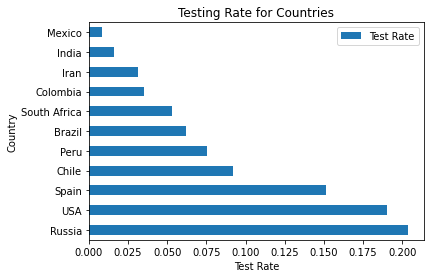

In [20]:
country_test_pop_df=country_df.drop(['TotalCases','TotalDeaths','TotalRecovered','ActiveCases','Serious,Critical'],axis=1)[:11].set_index("Country/Region")
country_test_pop_df['Population'] = country_test_pop_df['Population'].astype('int64') 
country_test_pop_df['Test Rate']=country_test_pop_df['TotalTests']/country_test_pop_df['Population']
country_test_pop_df=country_test_pop_df.drop(['Population','TotalTests'],axis=1).sort_values(by=['Test Rate'],ascending=False)
ax=country_test_pop_df.plot(kind="barh",title="Testing Rate for Countries")
ax.set_xlabel("Test Rate")
ax.set_ylabel("Country");

Now going country wise, USA has the heighest number of confirmed covid cases, followed by Brazil, India and Russia. Apart from that, The testing rate is heighest in Russia, followed by USA and Spain. This shows that USA, having a high number of covid cases, has the second heighest testing rate among other countries. India comes at 3rd position in confirmed covid cases and at 10th position in terms of testing rate.

### Information on world map

In [21]:
figure = px.choropleth(country_df,locations='Country/Region', locationmode='country names', color='TotalCases', hover_name='Country/Region', color_continuous_scale='tealgrn', range_color=[1,1000000],title='Countries with Confirmed cases')
figure.show()

In [22]:
figure = px.choropleth(country_df,locations='Country/Region', locationmode='country names', color='ActiveCases', hover_name='Country/Region', color_continuous_scale=px.colors.qualitative.Antique, range_color=[1,1000000],title='Active Cases')
figure.show()

### Comparison of India with other countries in terms of COVID Situation

In [23]:
data_url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
covid_df=pd.read_csv(data_url)

In [24]:
india_df=covid_df.loc[covid_df["location"]=="India"]
india_df=india_df[['date','total_cases']]
india_df.head()

,date,total_cases
68332,2020-01-30,1.0
68333,2020-01-31,1.0
68334,2020-02-01,1.0
68335,2020-02-02,2.0
68336,2020-02-03,3.0


In [25]:
us_df=covid_df.loc[covid_df["location"]=="United States"]
us_df=us_df[['date','total_cases']]
us_df.head()

,date,total_cases
154168,2020-01-22,1.0
154169,2020-01-23,1.0
154170,2020-01-24,2.0
154171,2020-01-25,2.0
154172,2020-01-26,5.0


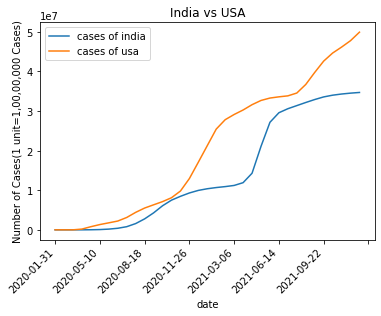

In [26]:
merged_df=india_df.merge(us_df,how="inner",on="date")[1:690:20]
merged_df=merged_df.rename({'total_cases_x':'cases of india','total_cases_y':'cases of usa'},axis=1).set_index("date")
ax=merged_df.plot(kind="line",title="India vs USA")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right')
ax.set_ylabel("Number of Cases(1 unit=1,00,00,000 Cases)");

In [27]:
brazil_df=covid_df.loc[covid_df["location"]=="Brazil"]
brazil_df=brazil_df[['date','total_cases']]
brazil_df.head()

,date,total_cases
20903,2020-02-26,1.0
20904,2020-02-27,1.0
20905,2020-02-28,1.0
20906,2020-02-29,2.0
20907,2020-03-01,2.0


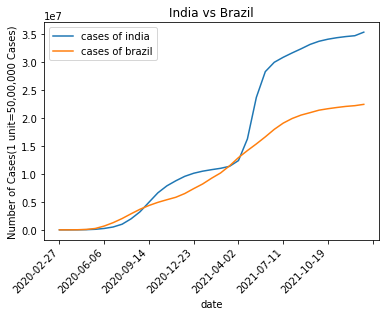

In [28]:
merged_df=india_df.merge(brazil_df,how="inner",on="date")[1:690:20]
merged_df=merged_df.rename({'total_cases_x':'cases of india','total_cases_y':'cases of brazil'},axis=1).set_index("date")
ax=merged_df.plot(kind="line",title="India vs Brazil")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right')
ax.set_ylabel("Number of Cases(1 unit=50,00,000 Cases)");

In [29]:
Russia_df=covid_df.loc[covid_df["location"]=="Russia"]
Russia_df=Russia_df[['date','total_cases']]
Russia_df.head()

,date,total_cases
121358,2020-01-31,2.0
121359,2020-02-01,2.0
121360,2020-02-02,2.0
121361,2020-02-03,2.0
121362,2020-02-04,2.0


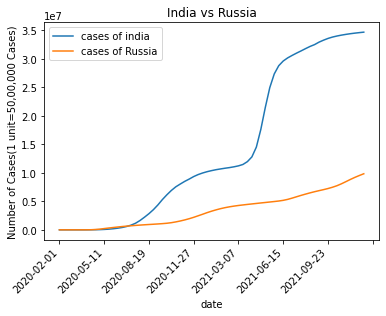

In [30]:
merged_df=india_df.merge(Russia_df,how="inner",on="date")[1:690:10]
merged_df=merged_df.rename({'total_cases_x':'cases of india','total_cases_y':'cases of Russia'},axis=1).set_index("date")
ax=merged_df.plot(kind="line",title="India vs Russia")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right')
ax.set_ylabel("Number of Cases(1 unit=50,00,000 Cases)");

By seeing the curves of the corresponding graphs of 'date' vs 'total cases', we can say that from the 1st graph, the slope of the line for USA(heighest number of confirmed cases) is more than India(3rd heighest number of confirmed cases), clearly showing that the cases in USA grew at a higher pace and amount in comparsion to India.
In rest of the 2 graphs, the slope of the line for India is greater, showing that cases in India grew at a higher pace and amount in comparison to Russia(4th heighest number of confirmed cases) and Brazil(2nd heighest number of confirmed cases).

# **Data Preprocessing**

In [51]:
predict_india_df=covid_df.loc[covid_df["location"]=="India"]
copy=predict_india_df.copy()

In [52]:
predict_india_df['date']=pd.to_datetime(predict_india_df['date'])
predict_india_df['date']=predict_india_df['date'].map(dt.datetime.toordinal)
predict_india_df=predict_india_df[['date','total_cases','total_deaths','total_cases_per_million','people_vaccinated','total_vaccinations']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



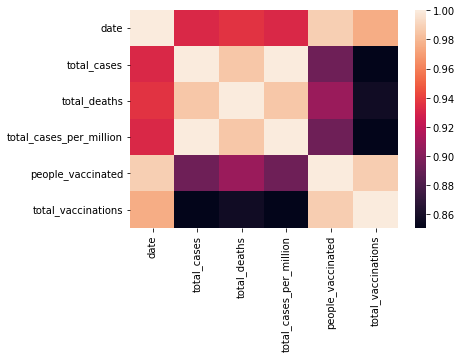

In [53]:
predict_india_df=predict_india_df.dropna()
sns.heatmap(predict_india_df.corr())

# **Define Target Variable (y) and Feature Variables (X)**

In [63]:
X=predict_india_df[['date','total_deaths','people_vaccinated','total_vaccinations']]
y=predict_india_df['total_cases']
X.shape

(389, 4)

# **Train Test Split**

In [83]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# **Modeling**

In [84]:
lr=RandomForestRegressor()
y_predict=lr.fit(x_train,y_train).predict(x_test)

# **Model Evaluation**

In [85]:
print(r2_score(y_test,y_predict))
print(mean_absolute_error(y_test,y_predict))

0.9998199368013115
53148.529230769316


# **Prediction**

In [86]:
predictions_of_cases=pd.DataFrame(y_predict,columns=['Predictions'])
predictions_of_cases

,Predictions
0,28928976.36
1,34421418.65
2,34530470.67
3,34693534.19
4,34372714.33
...,...
73,34701070.54
74,34329829.84
75,34163727.30
76,33782907.07


# **Explaination**

##### This project mainly deals with covid-19 data exploration worlwide, and predictions of number of cases originating at a particular date. All the graphs related to comparison of situation of COVID-19 among different countries was plotted, both continent wise and country wise, and outcome of all that was stated at the end.  
##### Also, the situation of COVID-19 in India was compared with other countries as well, with the help of appropriate graphs.
##### At the very end, predictions of total cases at a particular date with the help of RandomForestRegressor, was implemented.

